In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

The Equation for a Gaussian:

G(x) = $\frac{A}{\sigma\sqrt{2/pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

A = Amplitude

$\sigma$ = Describes the width of the line  
x = Is the array of values of gaussian spans  
$\mu$ = The actual centre of our gaussian 


In [55]:
# Now, lets define the above function
def gauss(x,A,mu,sig):
    """
    Returns a Gaussian Profile
    
    """
    gaussian = A/(sig* np.sqrt(2/np.pi)) * np.exp(-(x-mu)**2/2*sig**2)
    return gaussian

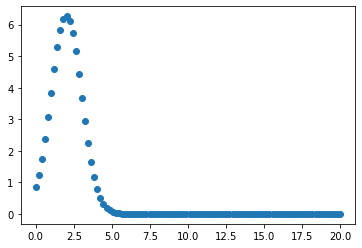

In [56]:
# let's test it once
x_t = np.linspace(0,20,100)
y_t = gauss(x_t ,5 , 2 , 1)

plt.scatter(x_t,gauss_t) #Cool

In [57]:
def non_linear_func_real(x_v, amp1,amp2,m1,m2,w1,cont): # cont will lift the curve in y coordinate
    """
    This Gaussian will combine Two Gaussian into one simulate model spectrum
    
    """
    
    return gauss(x_v,amp1,m1,w1) + gauss(x_v,amp2,m2,w1) + cont

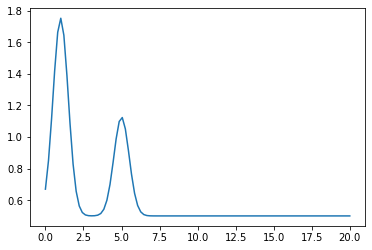

In [58]:
x_t2 = np.linspace(0,20,100)
y_t2 =non_linear_func_real(x_t2,1,2,5,1,2,0.5)
plt.plot(x_t2,y_t2)
plt.show()

In [72]:
def fit_data(wave,spec,amp1,amp2,m1,m2,w1,cont):
    """
    Fits to Gaussian profile of the specrumt to determine the
    amplitude ,line centers ,widths and continum of the input 
    spectrum.
    
    """
    print("=================================================")
    print("Performing A Least Squares fit......")
    
    popt, pcov = curve_fit(non_linear_func_real,wave,spec,p0 = [amp1,amp2,m1,m2,w1,cont])
    errs = np.sqrt(np.diag(pcov))
    print('=================================================')
    print('Printing Out The Best Fitting Parameters and 1 std errors......')
    print('=-------------------------------------------------')
    
    print('line 1 Amp:' + str(popt[0])+' Amp_err: ' +str(errs[0])+'\n')
    print('line 2 Amp:' + str(popt[1])+' Amp_err: ' +str(errs[1])+'\n')
    print('line 1 Wavelength:' + str(popt[2])+' Mean4959_err: ' +str(errs[2])+'\n')
    print('line 2 Wavelength:' + str(popt[3])+' Mean4959_err: ' +str(errs[3])+'\n')
    print('line width:' + str(popt[4])+' sigma_err: ' +str(errs[4])+'\n')
    print('Continuum Level:' + str(popt[5])+' Cont_err: ' +str(errs[5])+'\n')
    
    print('=================================================')
    print('Ploting the observed and modeled data....')
    y_m = non_linear_func_real(wave, *popt)
    plt.plot(wave,spec, label='data')
    plt.plot(wave,y_m, label='Model')
    plt.vlines(popt[2],ymin=0,ymax = spec.max(),linestyle='--',alpha=0.7, linewidth=0.7)
    plt.vlines(popt[3],ymin=0,ymax = spec.max(),linestyle='--',alpha=0.7, linewidth=0.7)
    
    
    plt.legend()
    plt.show()
    
    return popt , pcov

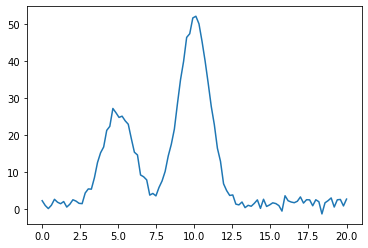

In [75]:
# Let's Fit our Model
wave_t = np.linspace(0,20,100)
pure_model = non_linear_func_real(wave_t,10,20,5,10,1,0.75)
func_t = pure_model + np.random.normal(loc=pure_model,size=len(pure_model))
plt.plot(wave_t,func_t)
plt.show()

Performing A Least Squares fit......
Printing Out The Best Fitting Parameters and 1 std errors......
=-------------------------------------------------
line 1 Amp:20.386737425204142 Amp_err: 0.38501165662334264

line 2 Amp:40.3524776368133 Amp_err: 0.5946523260997076

line 1 Wavelength:5.000779011453964 Mean4959_err: 0.019284280173220064

line 2 Wavelength:9.988583458269071 Mean4959_err: 0.009734820494467875

line width:1.0105017127945295 sigma_err: 0.00963515670076119

Continuum Level:1.4943767213765953 Cont_err: 0.1430095619337384

Ploting the observed and modeled data....


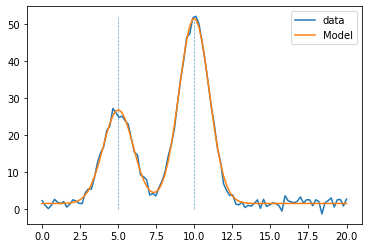

In [76]:
out_popt, out_pcov = fit_data(wave_t,func_t, 27,52,5,10.3,1.5,0.5)

z = $\frac{\lambda_o/\lambda_e}{\lambda_e}$

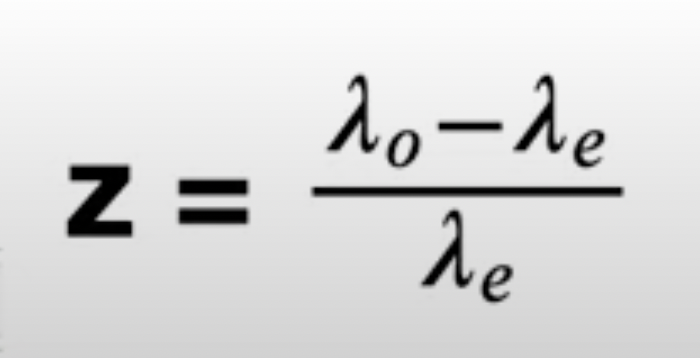

In [77]:
# z = Redshift
def redshift(lamo,lame):
    """
    It gives the redshift of the given light source
    observed at a rest frame wavelength
    """
    return (lamo-lame)/lame

In [80]:
z = redshift(6000,5688)
print("Redshift of the source:",z)

Redshift of the source: 0.05485232067510549
